In [32]:
import vtk
from vtk.util.numpy_support import vtk_to_numpy

# Load STL file
# Load STL file
reader = vtk.vtkSTLReader()
reader.SetFileName("models/3D_model.stl")
reader.Update()

# Create a mapper
mapper = vtk.vtkPolyDataMapper()
mapper.SetInputConnection(reader.GetOutputPort())

# Create an actor
actor = vtk.vtkActor()
actor.SetMapper(mapper)
actor.AddOrientation(90, 0, 0)
# Create a renderer
renderer = vtk.vtkRenderer()
renderer.AddActor(actor)
renderer.SetBackground(1, 1, 1)  # Set background to white

# Create a render window
renderWindow = vtk.vtkRenderWindow()
renderWindow.AddRenderer(renderer)
renderWindow.SetOffScreenRendering(1)  # Enable off-screen rendering

# Set the size of the render window
renderWindow.SetSize(800, 600)  # Adjust size as needed

# Render the scene
renderWindow.Render()

# Capture the image
windowToImageFilter = vtk.vtkWindowToImageFilter()
windowToImageFilter.SetInput(renderWindow)
windowToImageFilter.Update()

In [33]:
vtk_image = windowToImageFilter.GetOutput()
width, height, _ = vtk_image.GetDimensions()
vtk_array = vtk_image.GetPointData().GetScalars()
components = vtk_array.GetNumberOfComponents()

# Reshape the VTK array to a NumPy array
numpy_array = vtk_to_numpy(vtk_array).reshape((height, width, components))


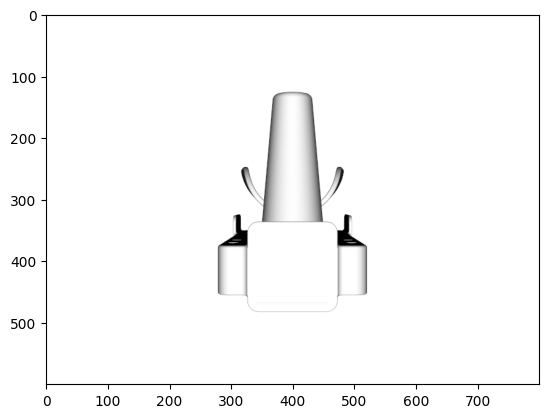

In [34]:
import matplotlib.pyplot as plt

plt.imshow(numpy_array)

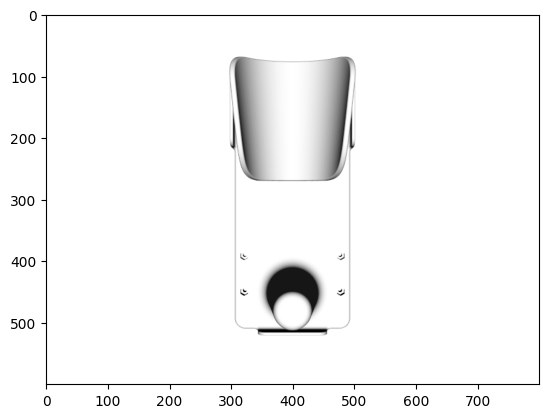

In [4]:
import numpy as np
matrix = vtk.vtkMatrix3x3()
matrix.SetElement(0, 0, 1)
matrix.SetElement(1, 1, 1)
matrix.SetElement(2, 2, 1)

matrix = vtk.vtkMatrix4x4()
angle = np.radians(45)  # Convert degrees to radians
matrix.Identity()
matrix.SetElement(0, 0, 1)
matrix.SetElement(1, 1, 1)
matrix.SetElement(2, 2, 1)
# matrix.SetElement(2, 2, np.cos(angle))


transform = vtk.vtkTransform()
transform.SetMatrix(matrix)
actor.SetUserTransform(transform)
# # Create a renderer
renderer = vtk.vtkRenderer()
renderer.AddActor(actor)
renderer.SetBackground(1, 1, 1)  # Set background to white

# Create a render window
renderWindow = vtk.vtkRenderWindow()
renderWindow.AddRenderer(renderer)
renderWindow.SetOffScreenRendering(1)  # Enable off-screen rendering

# Set the size of the render window
renderWindow.SetSize(800, 600)  # Adjust size as needed

# Render the scene
renderWindow.Render()

# Capture the image
windowToImageFilter = vtk.vtkWindowToImageFilter()
windowToImageFilter.SetInput(renderWindow)
windowToImageFilter.Update()

vtk_image = windowToImageFilter.GetOutput()
width, height, _ = vtk_image.GetDimensions()
vtk_array = vtk_image.GetPointData().GetScalars()
components = vtk_array.GetNumberOfComponents()

# Reshape the VTK array to a NumPy array
numpy_array = vtk_to_numpy(vtk_array).reshape((height, width, components))

plt.imshow(numpy_array)

In [5]:
R = np.array([[ 0.51456517, -0.25333656,  0.81917231],
       [ 0.16196059,  0.96687621,  0.19727939],
       [-0.8420163 ,  0.03116053,  0.53855136]])

t = np.array([0.0, 0.0, 0.0, 1.0])

M = np.empty((4, 4))

M[:3, :3] = R
# M[:3, 3] = t
M[3, :] = [0, 0, 0, 1]

In [6]:
vtk_matrix = vtk.vtkMatrix4x4()
for i in range(4):
    for j in range(4):
        vtk_matrix.SetElement(i, j, M[i, j])

In [52]:
default_ids = [[12, 88, 89]]
my_ids = np.array([89,88])
result = all(item in default_ids for item in my_ids)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [66]:
from scipy.spatial.transform import Rotation as R


In [72]:
r = R.from_euler('xyz', [0, -90, 0], degrees=True)
r.as_matrix()

array([[ 2.22044605e-16, -0.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00, -0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  2.22044605e-16]])